This notebooks aims to demonstrate some functionality of the python package <https://github.com/cknoll/semantictools>.

In [1]:
import time

print(time.ctime())
%load_ext nb_black
%load_ext ipydex.displaytools

Sat Feb 13 22:22:24 2021


<IPython.core.display.Javascript object>

In [2]:
from IPython.display import SVG, display, HTML

from semantictools import core as smt
import nxv
import importlib

# for easier co-development of library and notebook
importlib.reload(smt)

<module 'semantictools.core' from '/media/workcard/workstickdir/RST/expertise_system/semantictools/src/semantictools/core.py'>

<IPython.core.display.Javascript object>

In [3]:
len(smt.cache.wikidata_query_cache)

69

<IPython.core.display.Javascript object>

In [4]:
# basic query

smt.get_superclasses("Q1426191")

[{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7827200'},
  'itemLabel': {'xml:lang': 'en',
   'type': 'literal',
   'value': 'torsion-free module'},
  'id': 'Q7827200',
  'label': 'torsion-free module'}]

<IPython.core.display.Javascript object>

In [5]:
base_node = smt.Node({"id": "Q125977", "label": "vector space"})


G = smt.build_graph(base_node, n=3)
G.number_of_nodes() ##:

(G.number_of_nodes()) := 13

---

<IPython.core.display.Javascript object>

In [6]:
style = nxv.Style(
    graph={"rankdir": "TB"},
    node=lambda u, d: {
        "shape": "circle" if not u.is_top_level else "square",
        "fixedsize": True,
        "width": 1,
        "fontsize": 10,
    },
    edge=lambda u, v, d: {"style": "solid", "arrowType": "normal", "label": "is a"},
)

svg_data = nxv.render(G, style, format="svg")

<IPython.core.display.Javascript object>

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

// necessary to prevent auto scrolling for a long image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

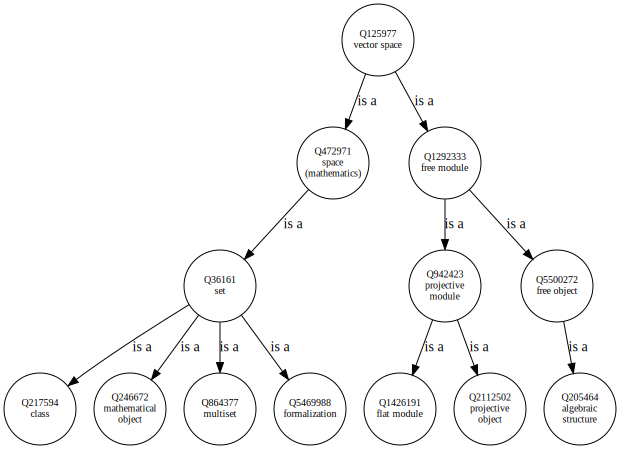

<IPython.core.display.Javascript object>

In [8]:
entity_links = dict(
    [
        (
            node.id,
            '<a href="http://www.wikidata.org/entity/{0}">{0}</a>'.format(node.id),
        )
        for node in G.nodes.keys()
    ]
)

# insert links to wiki data urls
svg_data = svg_data.decode("utf8").format(**entity_links).encode("utf8")

svg_fname = "vectorspace_superclasses_l3.svg"

with open(svg_fname, "wb") as svgfile:
    svgfile.write(svg_data)

display(SVG(svg_data))

In [9]:
display(HTML(f"<a href='{svg_fname}'>{svg_fname}</a>"))

<IPython.core.display.Javascript object>

In [10]:
%time G = smt.build_graph(base_node, n=13)
G.number_of_nodes() ##:

CPU times: user 1.83 ms, sys: 0 ns, total: 1.83 ms
Wall time: 1.83 ms


(G.number_of_nodes()) := 69

---

<IPython.core.display.Javascript object>

In [11]:
svg_data = nxv.render(G, style, format="svg")

<IPython.core.display.Javascript object>

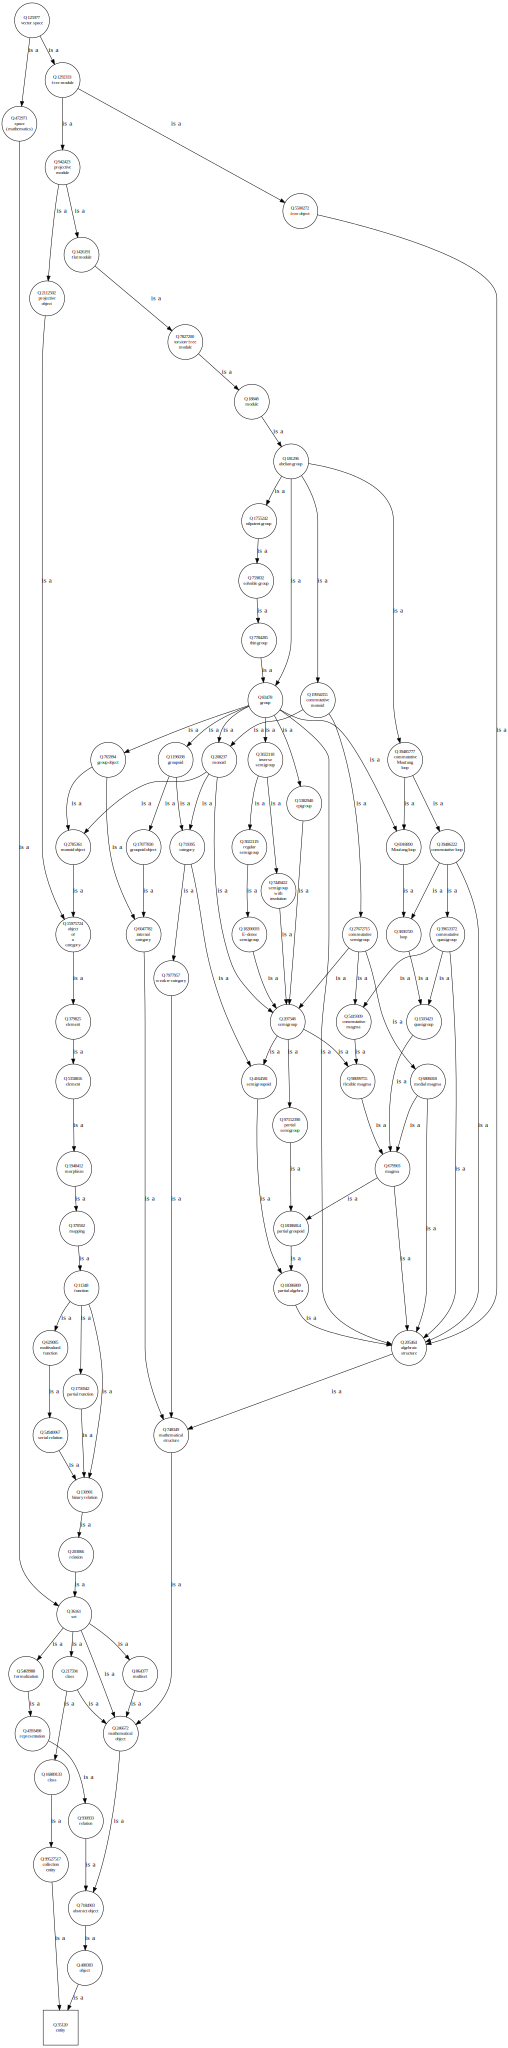

<IPython.core.display.Javascript object>

In [12]:
entity_links = dict(
    [
        (
            node.id,
            '<a href="http://www.wikidata.org/entity/{0}">{0}</a>'.format(node.id),
        )
        for node in G.nodes.keys()
    ]
)

# insert links to wiki data urls
svg_data = svg_data.decode("utf8").format(**entity_links).encode("utf8")

svg_fname = "vectorspace_superclasses_l13.svg"

with open(svg_fname, "wb") as svgfile:
    svgfile.write(svg_data)

display(SVG(svg_data))

In [13]:
display(HTML(f"<a href='{svg_fname}'>{svg_fname}</a>"))

<IPython.core.display.Javascript object>

Save the wikidata query results to prevent unnecessary requests

In [14]:
smt.cache.save_wdq_cache()

print(smt.cache.wdq_cache_path)

/tmp/tmpq4gm6bdi_semantictools_wdq_cache.pcl


<IPython.core.display.Javascript object>